STUDENT PERFROMANCE INDICATOR

Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# importing the csv data as a dataframe

df = pd.read_csv('Data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's 

degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

In [6]:
df.shape

(1000, 8)

Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [7]:
# check for missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

In [9]:
# check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# check for unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# check statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

All means are very close to each other - 66-68%

All std's are also close - between 14.6 and 15.19

No min score for math, min for writing is 10 and 17 for reading which is higher


Exploring Data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [19]:
# define numerical and Categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding columns for "total score" and "Average"

In [21]:
df['total'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total']/3

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")


Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 7
Number of students with full marks in Writing: 14


In [27]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total                          0
average                        0
dtype: int64

In [28]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writng: {writing_less_20}')




Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writng: 3


Insights

From the above analyis;

Worst performance is in Maths

Best performance is in Reading

Histogram and KDE

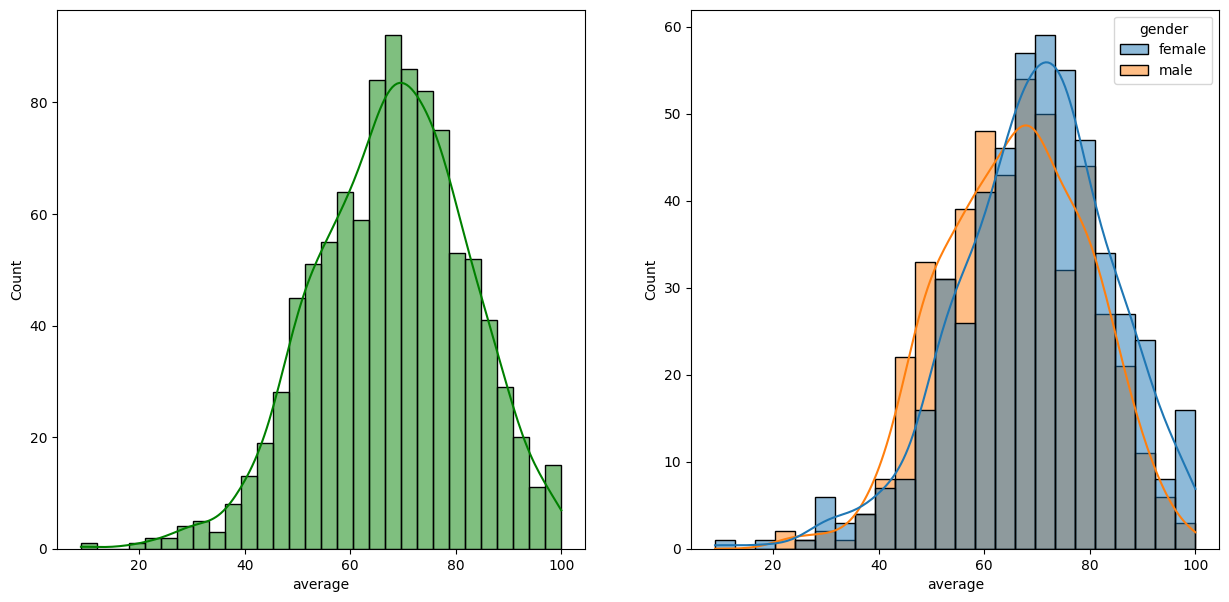

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


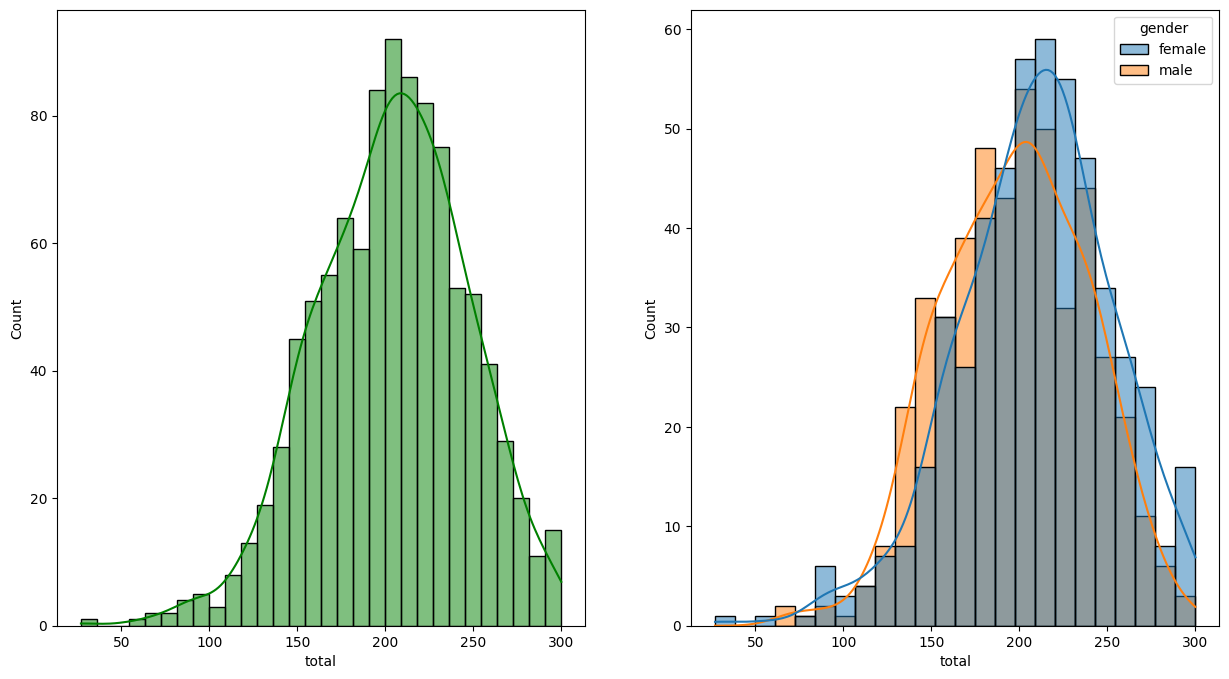

In [35]:
fig, axis = plt.subplots(1,2, figsize=(15, 8))
plt.subplot(121)
sns.histplot(data=df,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well than male students

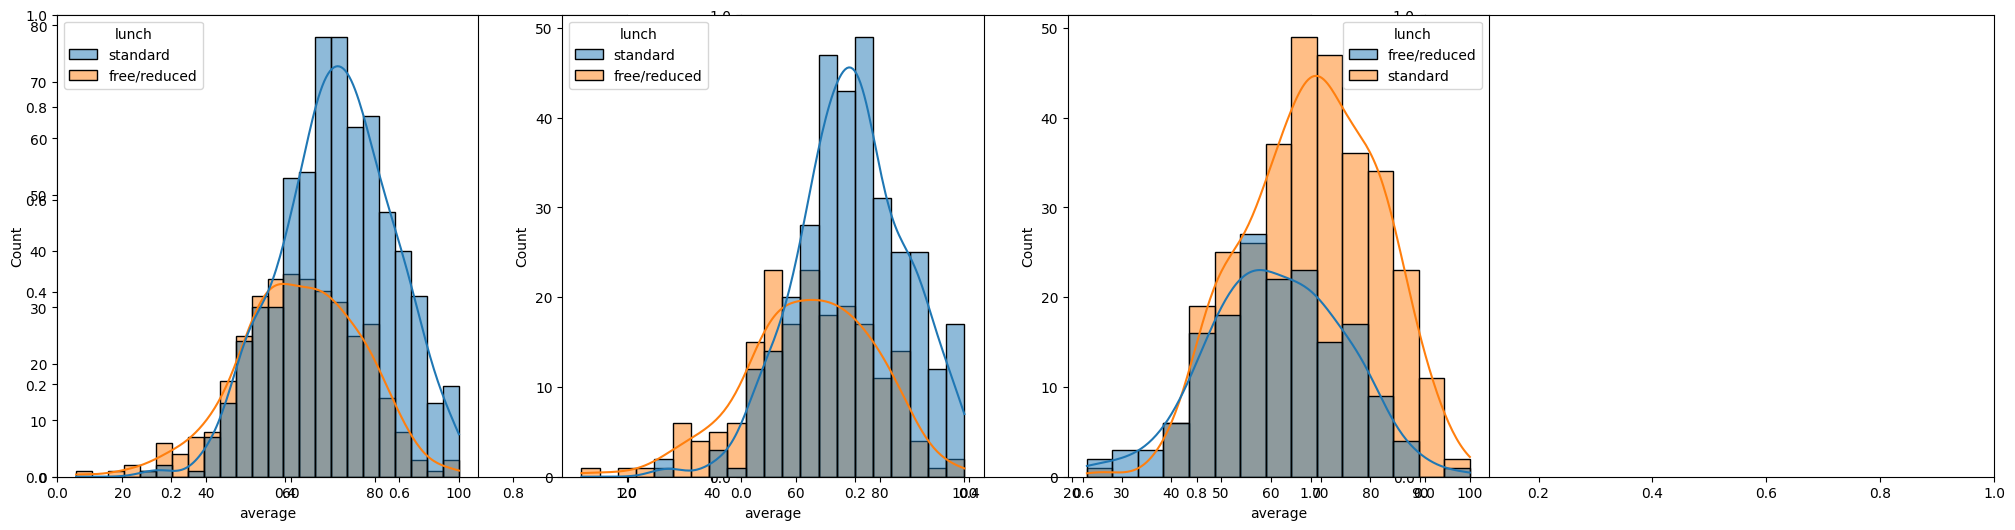

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

Standard lunch helps both male and female students perform better

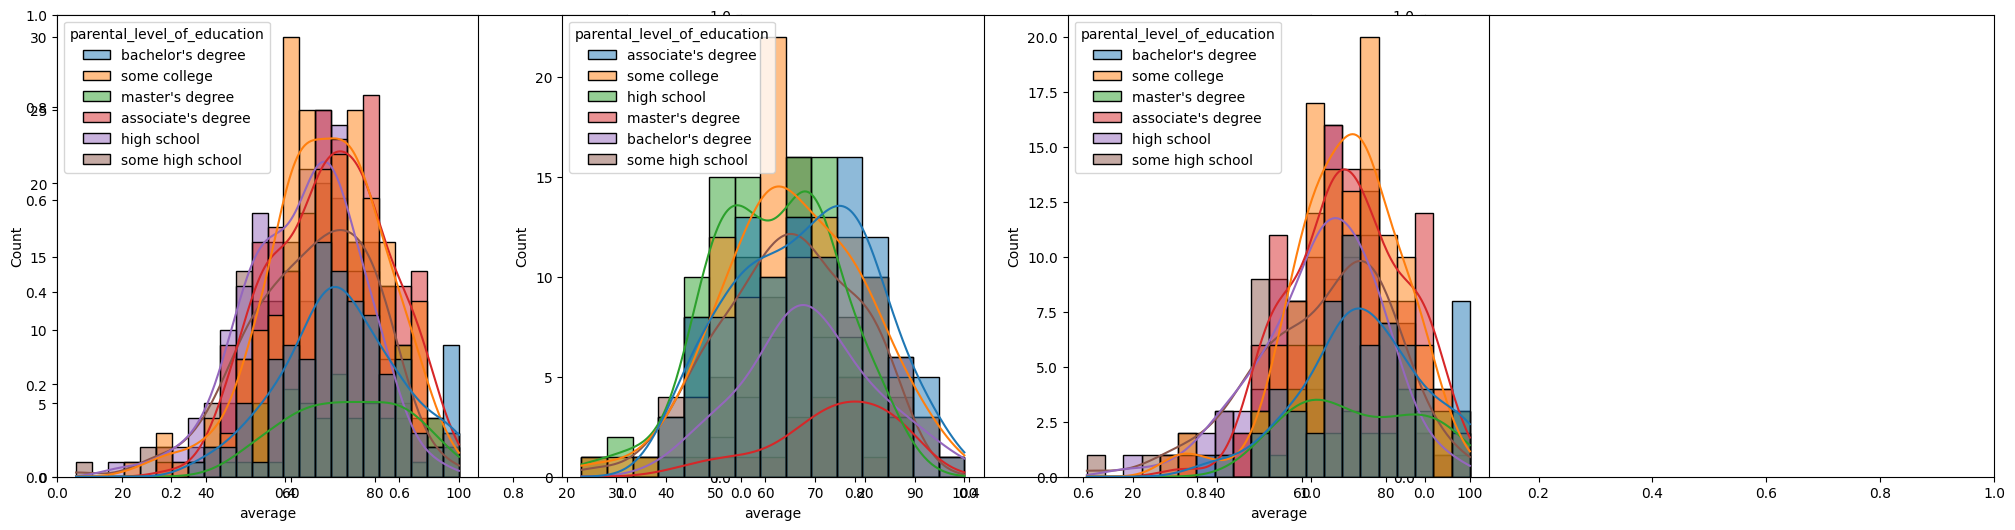

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights

In general, a parent's level of education doesn't really help their child's perfomance

2nd plot shows that male children whose parents have an associate degree perform well. Although that's not the general case for all

3rd plot shows no effect on female students


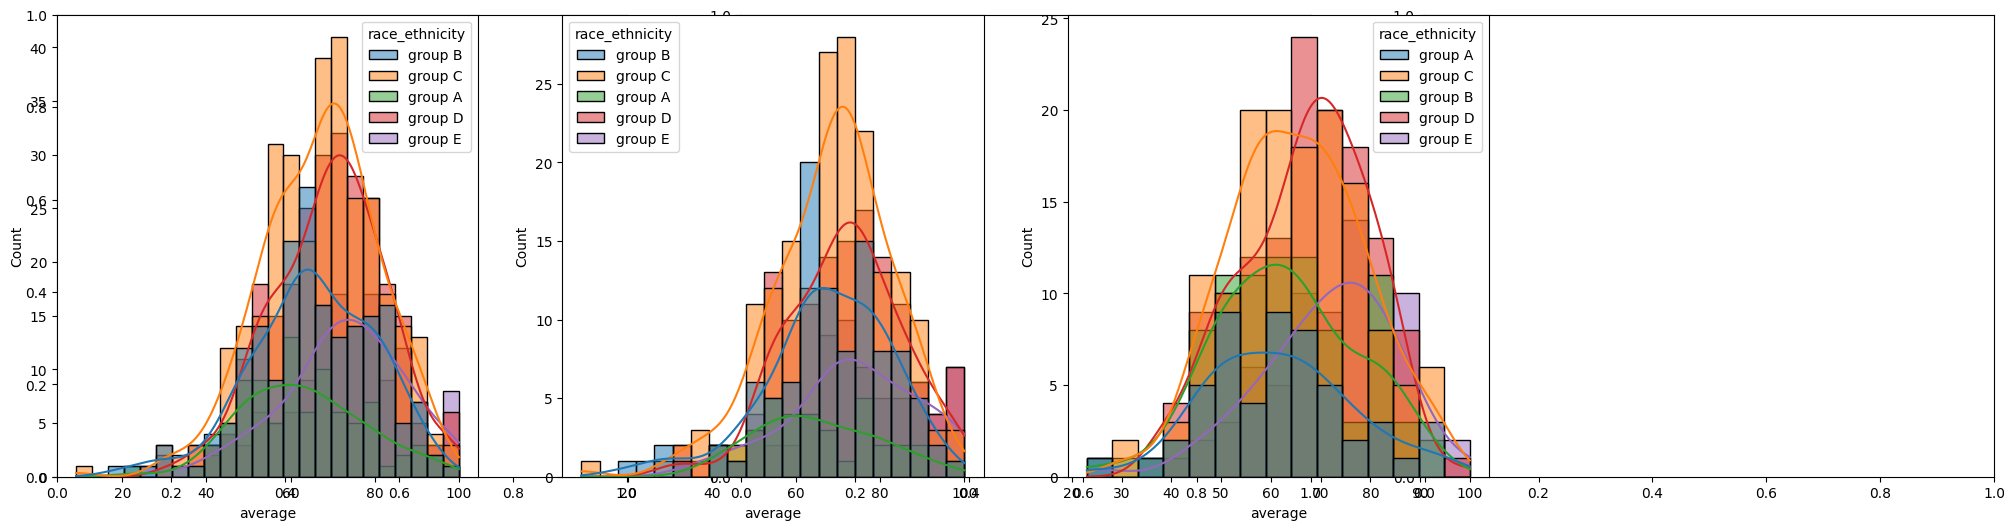

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights

Generally, students in group A and group B tend to perform poorly in exam

Most students in group C perform best in exams genrally

Best peformance for the female category comes from group C

Best performance for the male category comes from group D



Max Score of Students in the Three Subjects

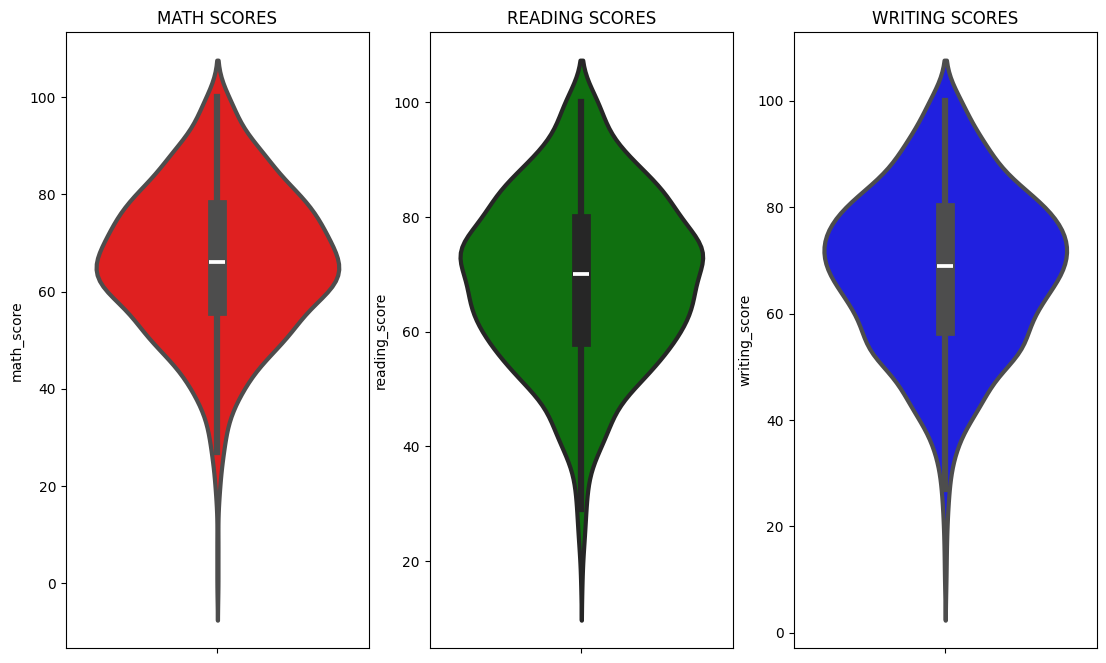

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


Insights

From the above plots, it is clearly visible that most of the students have scores between 60 and 80 in Maths,

Whereas in reading and writing, most students have scores between mid 50 and 80

Multivariate analysis using pyplot


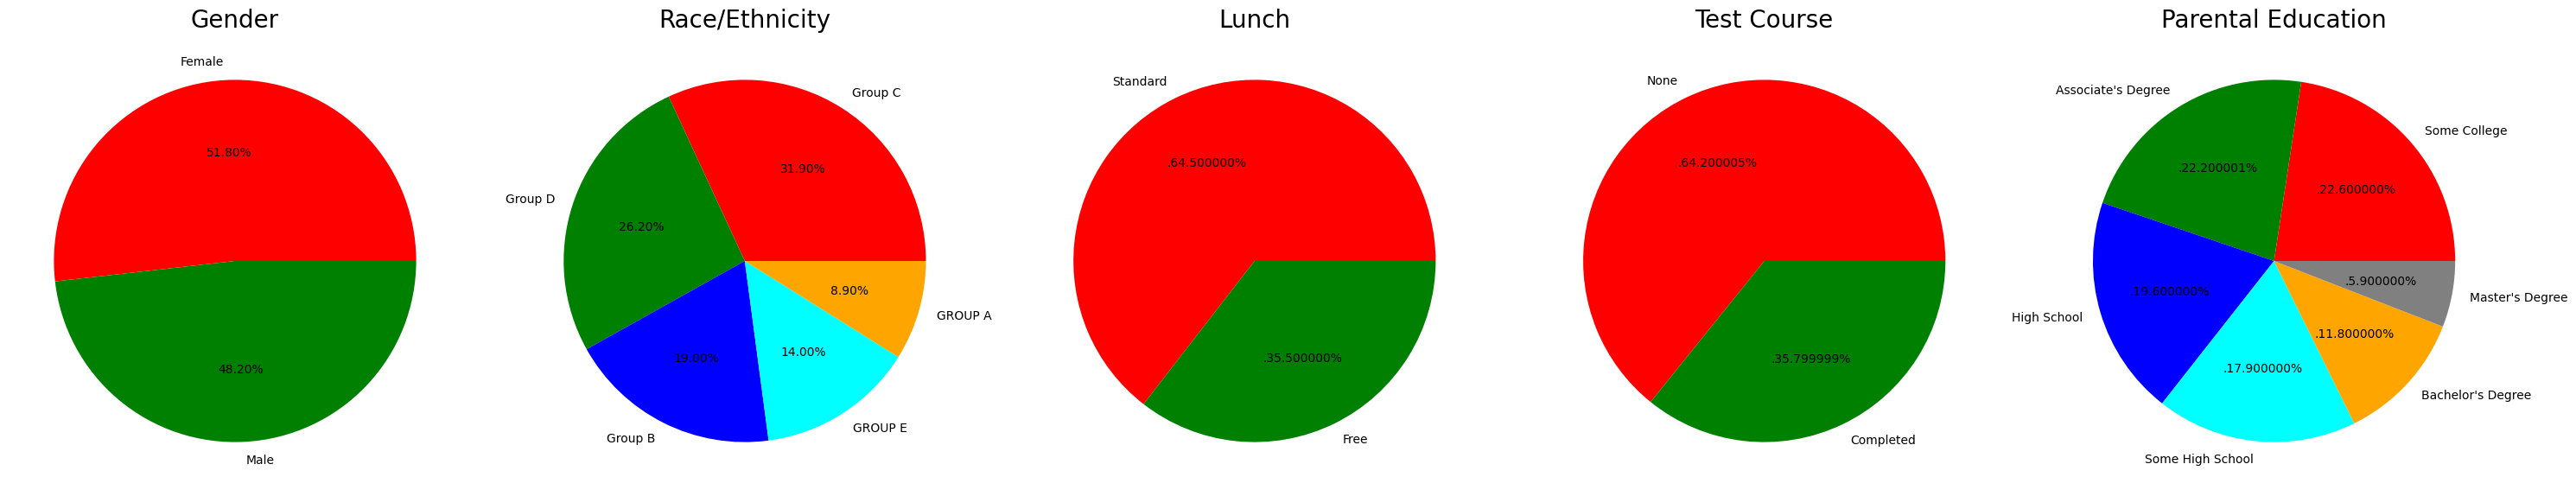

In [51]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels =labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'GROUP E', 'GROUP A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights:

Numbers of Male and Female students are almost equal

Number students is greater in Group C

Number of students who have standard lunch is greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

Examine the distribution of Gender

What impact does it have on students' performance?

Gender has balanced data with female students are 518 (48%) 

and male students are 482 (52%)

BIVARIATE ANALYSIS ( What impact does Gender have on students' performance ? )

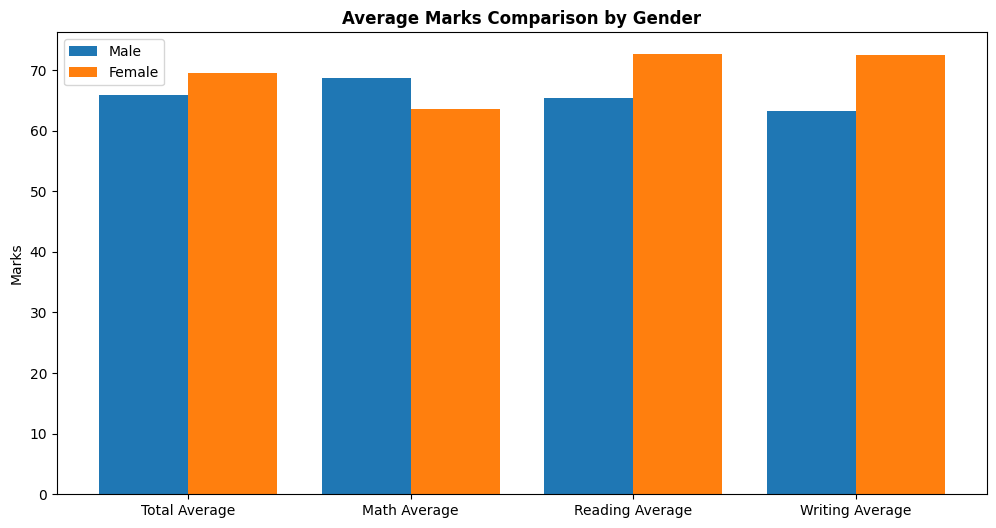

In [63]:
gender_group = df.groupby('gender').mean(numeric_only=True)

labels = ["Total Average", "Math Average", "Reading Average", "Writing Average"]

# getting male scores

male_scores = [
    gender_group.loc["male", "average"],
    gender_group.loc["male", "math_score"],
    gender_group.loc["male", "reading_score"],
    gender_group.loc["male", "writing_score"]
]

# getting female scores

female_scores = [
    gender_group.loc["female", "average"],
    gender_group.loc["female", "math_score"],
    gender_group.loc["female", "reading_score"],
    gender_group.loc["female", "writing_score"]
]

# Create the X axis positions

x = np.arange(len(labels))
width = 0.4

# Make the bar chart

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, male_scores, width, label='Male')
plt.bar(x + width/2, female_scores, width, label="Female")


# label the chart

plt.xticks(x, labels)
plt.ylabel("Marks")
plt.title("Average Marks Comparison by Gender", fontweight="bold")
plt.legend()
plt.show()


Insights:

On average, females have a better overall score than males

However, males have a better score in Maths

BIVARIATE ANALYSIS ( What Impact does Race/Ehnicity has on a student's performance ?)

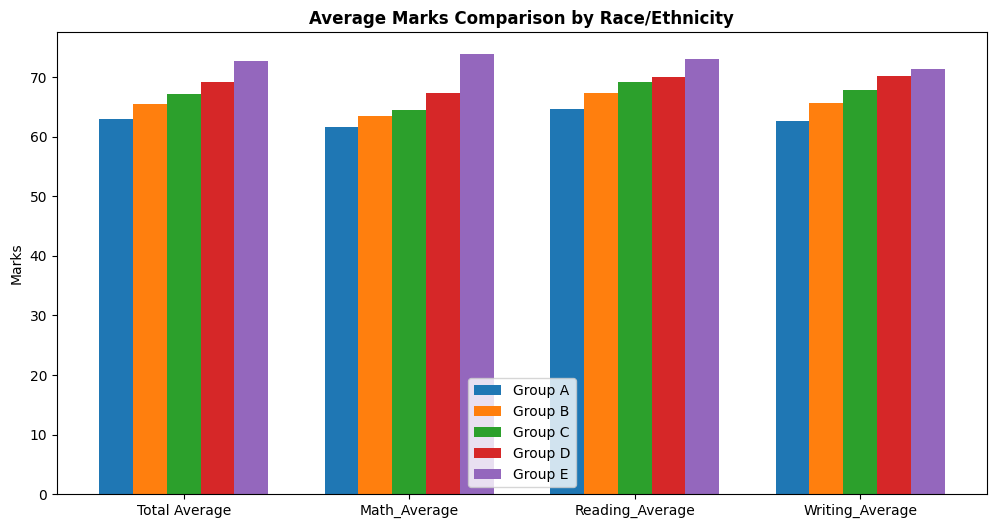

In [67]:
race_group = df.groupby('race_ethnicity').mean(numeric_only=True)

labels = ["Total Average", "Math_Average", "Reading_Average", "Writing_Average"]

GrpA_scores = [
    race_group.loc["group A", "average"],
    race_group.loc["group A", "math_score"],
    race_group.loc["group A", "reading_score"],
    race_group.loc["group A", "writing_score"]
]

GrpB_scores = [
    race_group.loc["group B", "average"],
    race_group.loc["group B", "math_score"],
    race_group.loc["group B", "reading_score"],
    race_group.loc["group B", "writing_score"]
]

GrpC_scores = [
    race_group.loc["group C", "average"],
    race_group.loc["group C", "math_score"],
    race_group.loc["group C", "reading_score"],
    race_group.loc["group C", "writing_score"]
]

GrpD_scores = [
    race_group.loc["group D", "average"],
    race_group.loc["group D", "math_score"],
    race_group.loc["group D", "reading_score"],
    race_group.loc["group D", "writing_score"]
]

GrpE_scores = [
    race_group.loc["group E", "average"],
    race_group.loc["group E", "math_score"],
    race_group.loc["group E", "reading_score"],
    race_group.loc["group E", "writing_score"]
]


x = np.arange(len(labels))

width = 0.15

plt.figure(figsize=(12, 6))
plt.bar(x - 2*width, GrpA_scores, width, label='Group A') # Shift left by 2 widths
plt.bar(x - width, GrpB_scores, width, label='Group B') # Shift left by 1 width
plt.bar(x, GrpC_scores, width, label = 'Group C') # No shift (centred)
plt.bar(x + width, GrpD_scores, width, label='Group D') # Shift right by 1
plt.bar(x + 2*width, GrpE_scores, width, label = 'Group E') # SHift right by 2


plt.xticks(x,labels)
plt.ylabel("Marks")
plt.title("Average Marks Comparison by Race/Ethnicity", fontweight="bold")
plt.legend()
plt.show()


Insights:

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

BIVARIATE ANALYSIS(What impact does parental education have on students' performances?)

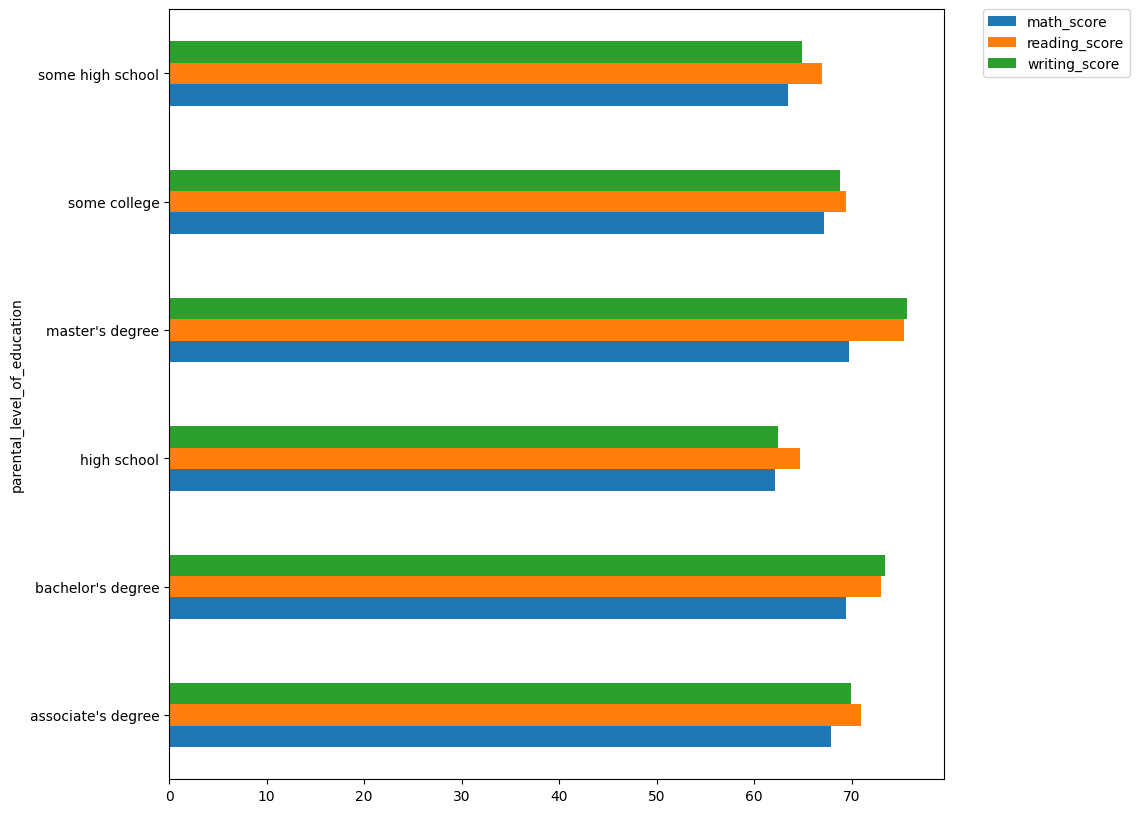

In [69]:
# Group by 'parental_level_of_education' and calculate mean for numeric columns
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().plot(kind='barh', figsize=(10, 10))

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


Insights

The score of student whose parents possess master and bachelor level education are higher than others.

BIVARIATE ANALYSIS on lunch type

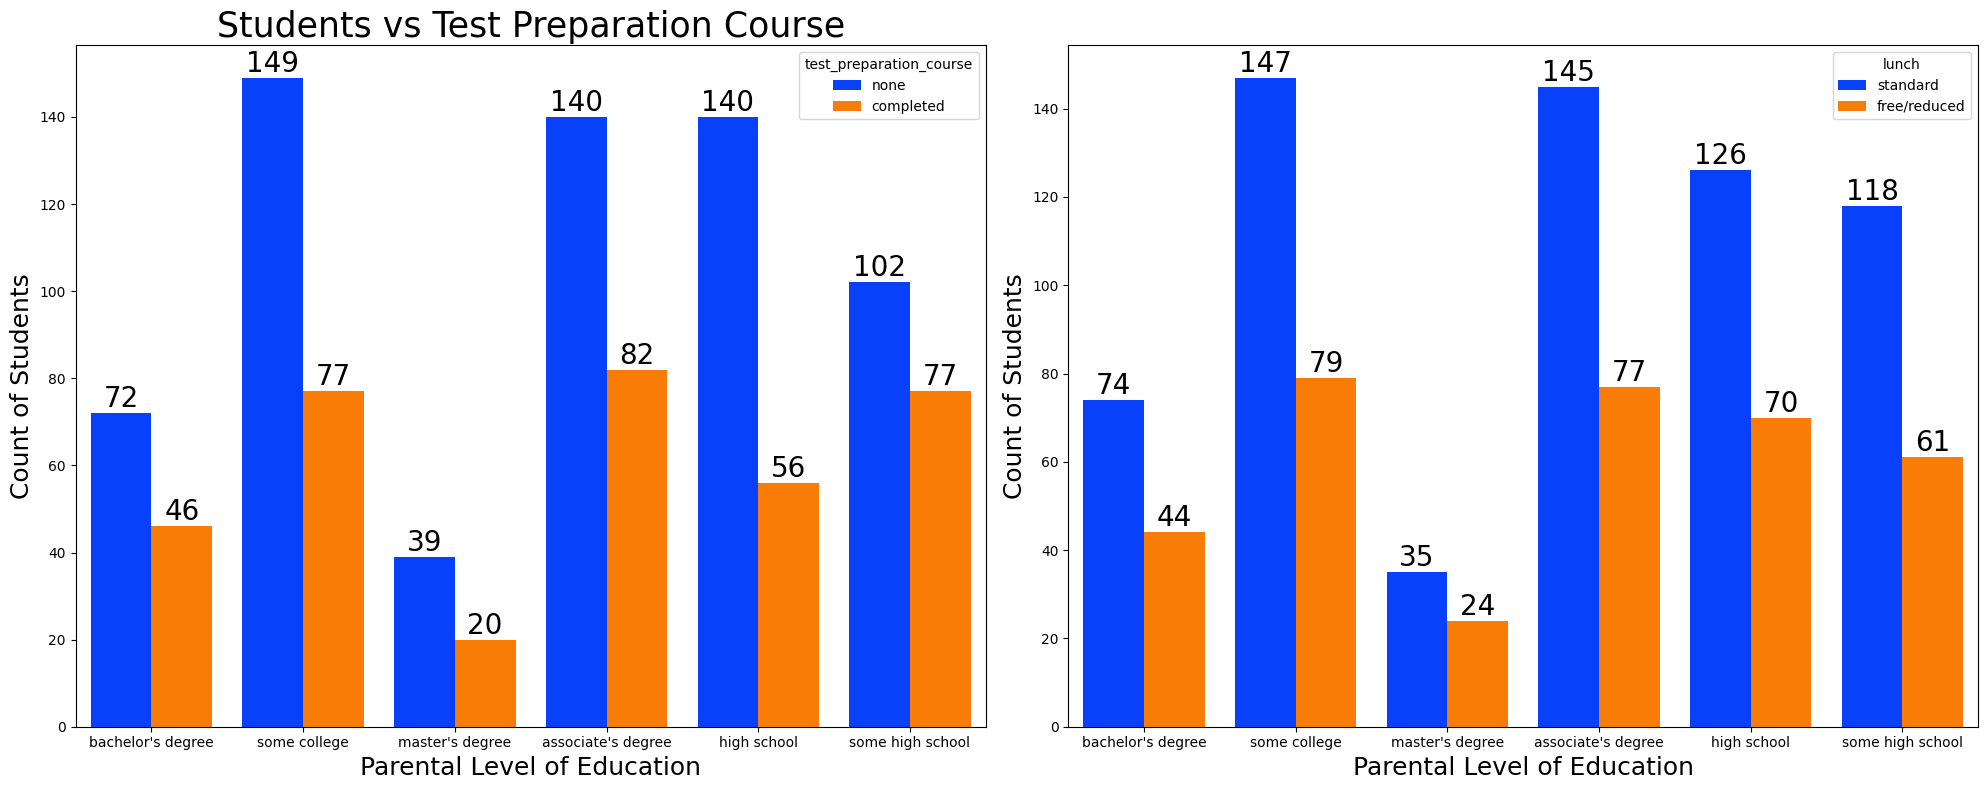

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (1 row, 2 columns)
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First plot: Students vs test preparation course
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Add labels to bars in the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second plot: Students vs lunch type
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])

# Add labels to bars in the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Optional: Set titles and labels for clarity
ax[0].set_xlabel('Parental Level of Education', fontsize=18)
ax[1].set_xlabel('Parental Level of Education', fontsize=18)
ax[0].set_ylabel('Count of Students', fontsize=18)
ax[1].set_ylabel('Count of Students', fontsize=18)

# Adjusting layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()



Insights

Students who get standard tend to perform better than students who get free/reduced 

BIVARIATE ANALYSIS (Does Test prep have any impact?)


<Axes: xlabel='lunch', ylabel='writing_score'>

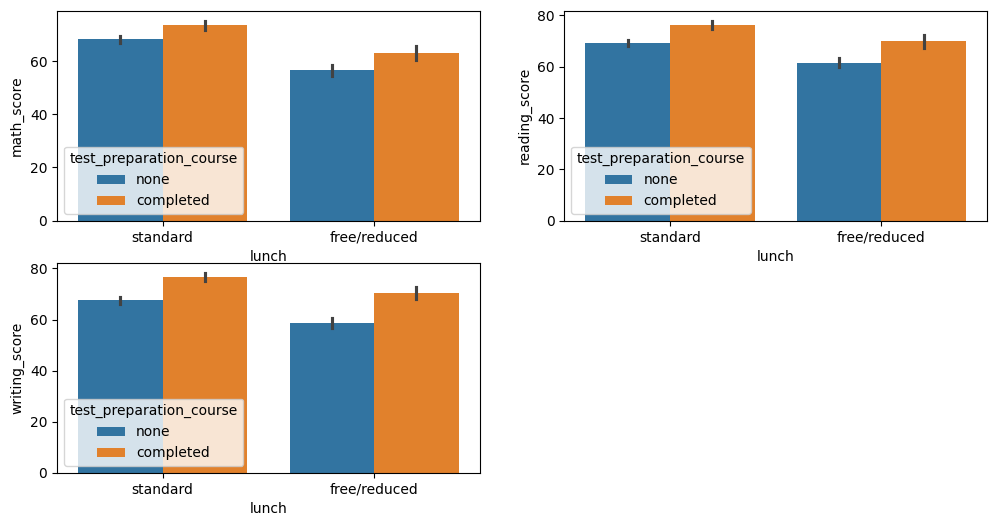

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

CHECKING OUTLIERS

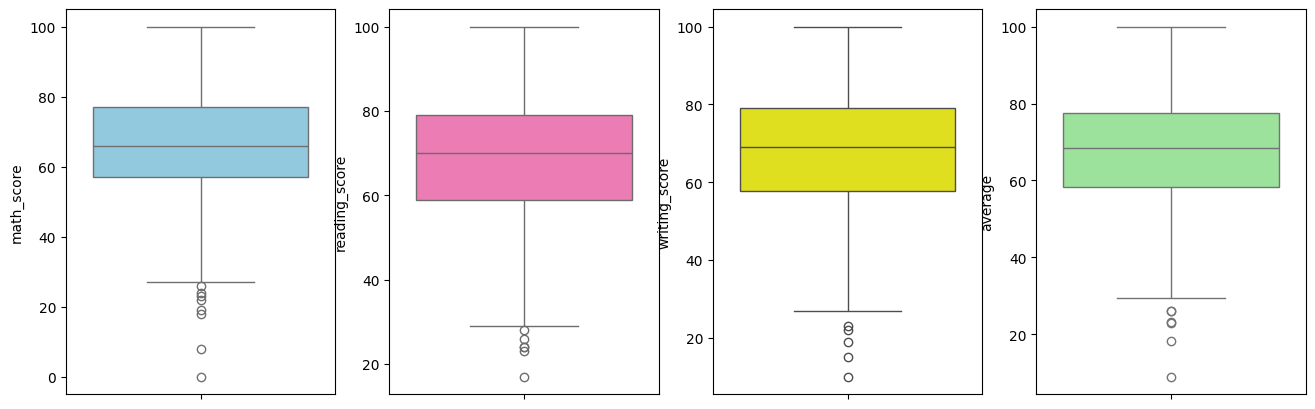

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


MUTIVARIATE ANALYSIS USING PAIRPLOT

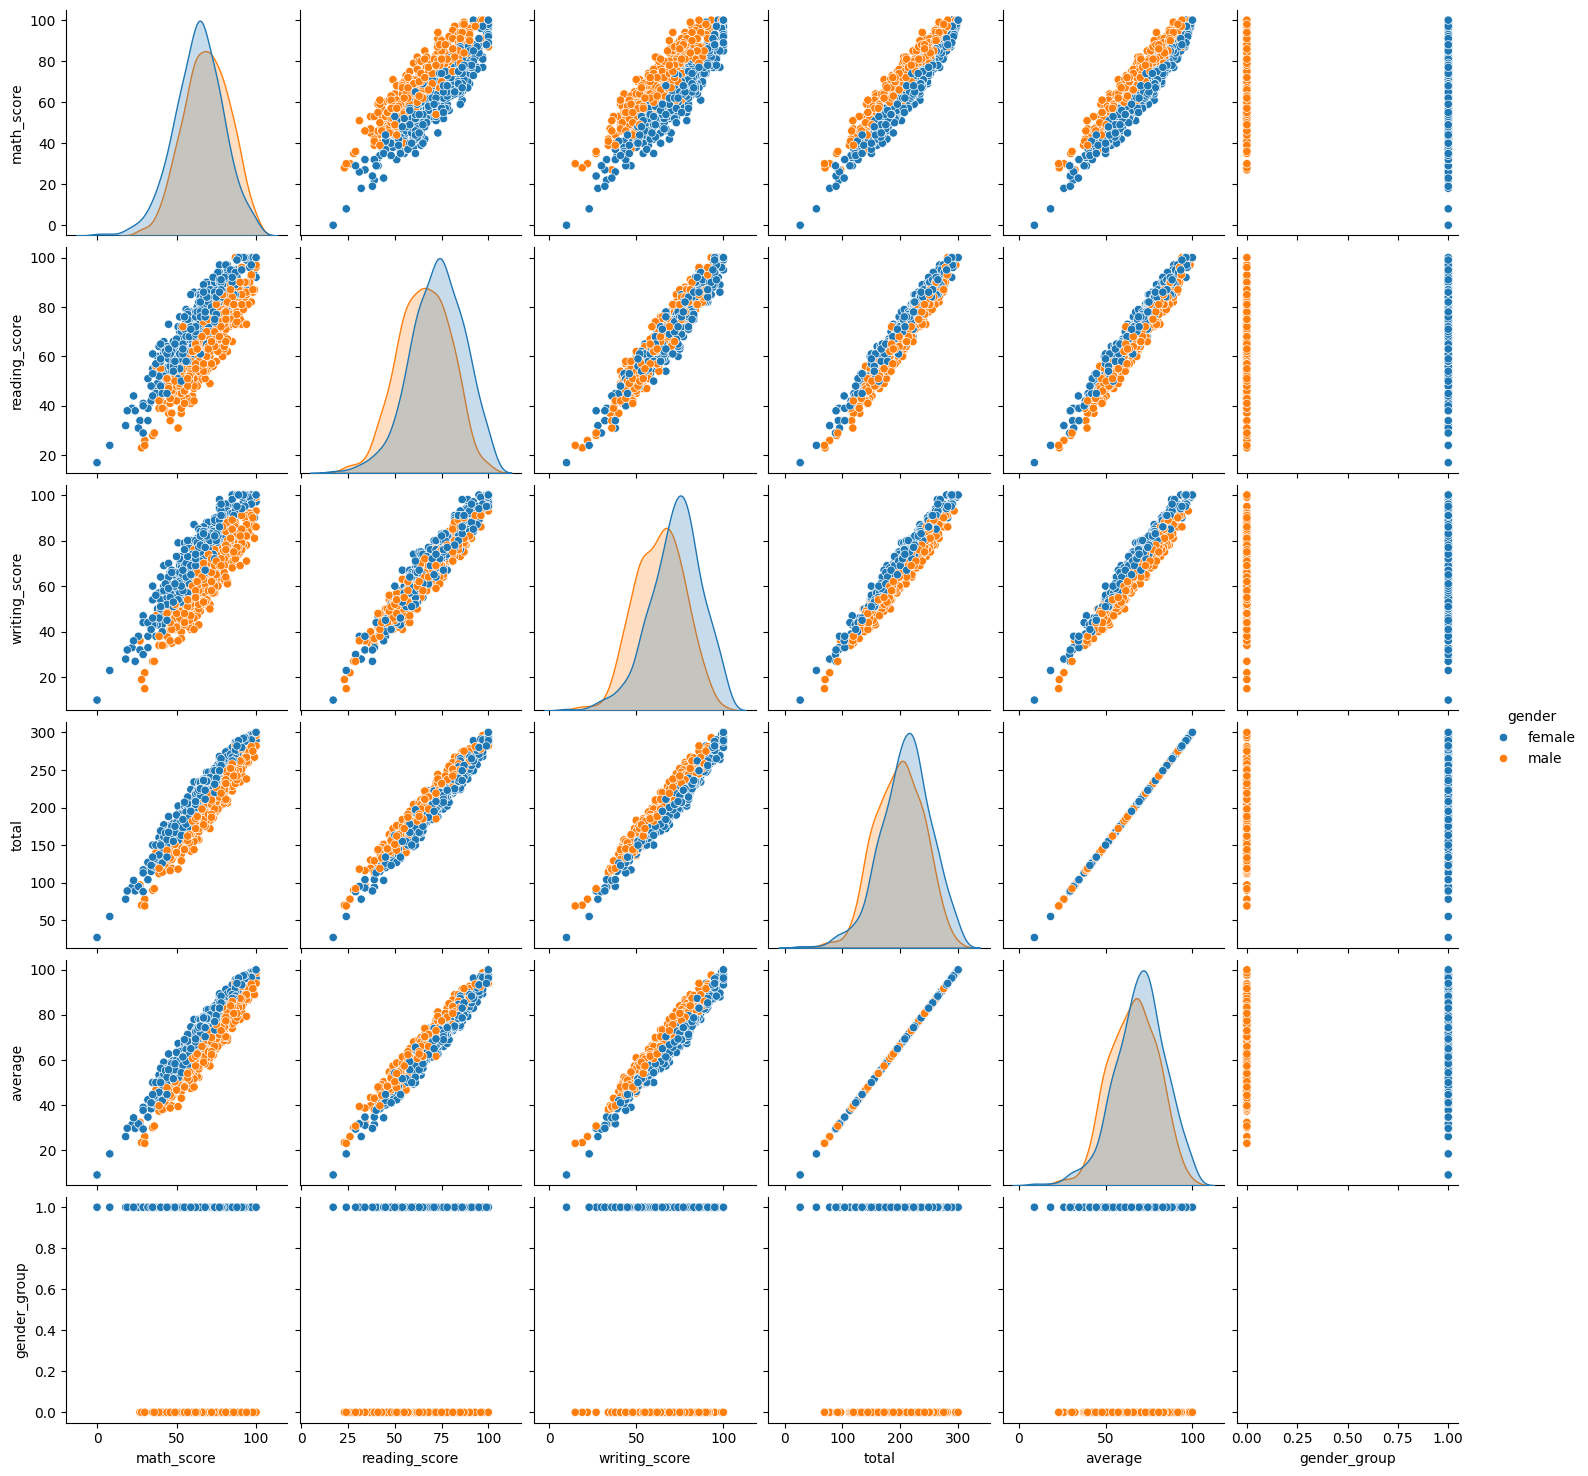

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights:

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is beneficial